<a href="https://colab.research.google.com/github/creamcheesesteak/test_deeplearning/blob/master/wine_deeplearning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
wine = datasets.load_wine()

In [3]:
wine.keys()  # 'target'은 y의 data임 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
x_data = wine['data']
x_data.shape

(178, 13)

In [5]:
y_data = wine['target']
y_data.shape

(178,)

In [6]:
data = np.c_[x_data, y_data]

# data to DB 저장 + table(data, target)

In [7]:
import pandas as pd

df_wine = pd.DataFrame(data)

In [8]:
# df_wine.iloc[:, 0:12]

In [9]:
import sqlite3
connect = sqlite3.connect('./db.sqlite3')
df_wine.to_sql('wine_dataframe', connect, if_exists='append', index=False)

# DB 불러오기

In [10]:
df_load = pd.read_sql_query('select * from wine_dataframe', connect)

In [11]:
df_load.shape

(178, 14)

In [12]:
# df_load.iloc[:, 0:13]

In [13]:
x_data = df_load.iloc[:, 0:13].to_numpy()
x_data.shape

(178, 13)

In [14]:
y_data = df_load.iloc[:, 13:14].to_numpy()
y_data.shape

(178, 1)

In [15]:
np.unique(y_data)

array([0., 1., 2.])

# 데이터 전처리, split

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [18]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((124, 13), (54, 13))

deeplearning model 만들기

In [20]:
import tensorflow as tf

In [21]:
model = tf.keras.Sequential()

In [22]:
model.add(tf.keras.Input(13, )) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(3, activation='softmax')) # output layer

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

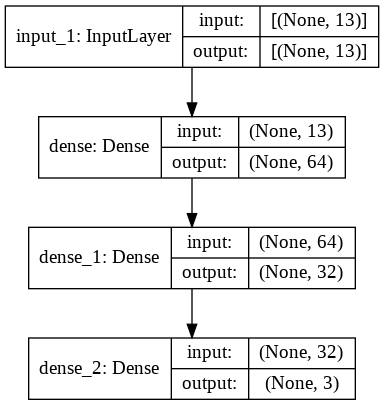

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True)

# 교육

In [24]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
3/3 [==============================] - 1s 91ms/step - loss: 1.1348 - acc: 0.4070 - val_loss: 1.0899 - val_acc: 0.3421
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 1.0971 - acc: 0.4419 - val_loss: 1.0546 - val_acc: 0.3684
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0623 - acc: 0.4535 - val_loss: 1.0219 - val_acc: 0.4474
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 1.0292 - acc: 0.4767 - val_loss: 0.9917 - val_acc: 0.4737
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.9987 - acc: 0.5233 - val_loss: 0.9633 - val_acc: 0.5263
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.9705 - acc: 0.5349 - val_loss: 0.9365 - val_acc: 0.5789
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.9427 - acc: 0.5465 - val_loss: 0.9119 - val_acc: 0.6316
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.9177 - acc: 0.60

# 평가

In [25]:
model.evaluate(x_train, y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.1566 - acc: 0.9839


[0.15660054981708527, 0.9838709831237793]

In [26]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [27]:
import matplotlib.pyplot as plt

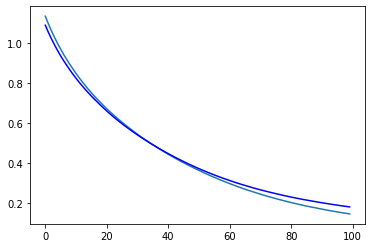

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

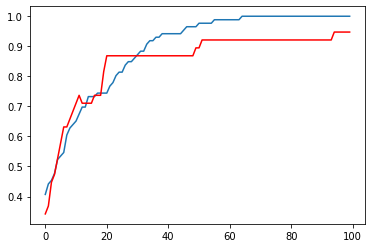

In [29]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# 서비스

In [30]:
x_train[18], y_train[18]

(array([-0.53597516, -0.62476348, -1.5332207 ,  0.3088377 , -1.15592617,
        -0.30465005, -0.31878729, -0.21771228, -0.55120581, -0.92764495,
         0.35956171,  1.10598084, -0.24942491]), array([1.]))

In [33]:
pred = model.predict([[-0.53597516, -0.62476348, -1.5332207 ,  0.3088377 , -1.15592617, -0.30465005, -0.31878729, -0.21771228, -0.55120581, -0.92764495, 0.35956171,  1.10598084, -0.24942491]])

In [34]:
np.argmax(pred)

1